In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 


In [2]:
from tensorflow.keras.datasets import mnist 

In [3]:
(X_train,y_train),(X_test,y_test) =mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


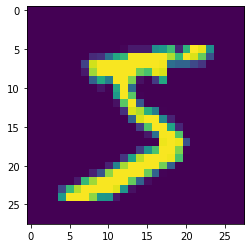

In [4]:
plt.imshow(X_train[0])

In [5]:
y_train[0]

5

In [6]:
only_zeros = X_train[y_train==0]

In [7]:
only_zeros.shape

(5923, 28, 28)

In [8]:
import tensorflow as tf 
from tensorflow.keras.layers import Dense,Reshape,Flatten
from tensorflow.keras.models import Sequential 

In [9]:
#Discriminator Mpdel
discriminator = Sequential()
discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(150,activation='relu'))
discriminator.add(Dense(100,activation='relu'))
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer='adam')

In [10]:
coding_size=100
generator=Sequential()
generator.add(Dense(100,activation='relu',input_shape=[coding_size]))
generator.add(Dense(150,activation='relu'))
generator.add(Dense(784,activation='relu'))
generator.add(Reshape([28,28]))

In [11]:
GAN=Sequential([generator,discriminator])

In [12]:
discriminator.trainaible=False 

In [13]:
GAN.compile(loss='binary_crossentropy',optimizer='adam')

In [14]:
data=only_zeros
dataset= tf.data.Dataset.from_tensor_slices(data).shuffle(buffer_size=1000)

In [15]:
dataset=dataset.batch(batch_size=32,drop_remainder=True).prefetch(1)



In [16]:
GAN.layers

In [17]:
GAN.layers[1].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 150)               117750    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 132,951
Trainable params: 132,951
Non-trainable params: 0
_________________________________________________________________


In [18]:
generator,discriminator =GAN.layers
batch_size=32
epochs=1
for epoch in range(epochs):
  i=0 
  print(f"Currently on epoch {epoch+1}" )
  for batch in dataset:
    i=i+1
    if i%100==0:
      print(f"Currently on batch {i}" )
    #DISCRIMINATOR TRAINING PHASE
    noise =tf.random.normal(shape=[batch_size,coding_size])
    gen_images=generator(noise)
    X_fake_vs_real= tf.concat([gen_images,tf.dtypes.cast(batch,tf.float32)],axis=0)
    y1 = tf.constant([[0.0]]*batch_size+[[1.0]]*batch_size)
    discriminator.trainable=True 
    discriminator.train_on_batch(X_fake_vs_real,y1)
    #GENERATOR TRAINING PHASE
    noise =tf.random.normal(shape=[batch_size,coding_size])
    y2=tf.constant([[1.0]]*batch_size)
    discriminator.trainable=False 
    GAN.train_on_batch(noise,y2)

Currently on epoch 1
Currently on batch 100


In [19]:
noise = tf.random.normal(shape=[10,coding_size])

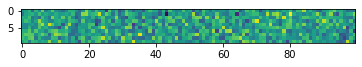

In [20]:
plt.imshow(noise)

In [21]:
image=generator(noise)

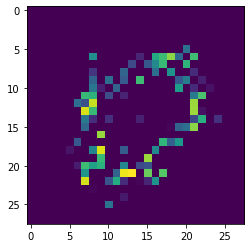

In [22]:
plt.imshow(image[5])